# Import Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Narrative and Problem Solving

The chi-square goodness of fit test can be used to determine whether a random variable has a specific probability distribution. 

A multinomial probability distributiion is an extension of the binomial probability distribution of the case where there are three or more categories of outcomes per trial.  The category probabilities are the key paramters of the multinomial distribution. For an application of a goodness of fit test to a multinomial probability distribution, refer to the market share for the smart phone industry.

Let's assume that market shares for smart phones have stabilized at 30% for Samsung, 50% for Apple, and 20% for Google. Since each customer is classified as buying from one of these companies, we have a multinomial probability distribution with three possible categories of outcomes. The probability for each of the three categories is as follows.

Pa = probability a customer purchases a Samsung phone
Pb = probability a customer purchases an Apple phone
Pc = probability a customer purchases a Google phone

Using the historical market shares, we have a multinomial probability distribution with Pa = .30, Pb = .50, and Pc = .20.

Google has introduced a new phone to replace its current entry in the market. Market research was conducted to determine if the new phone will change the market shares for the three companies. A sample of customers will be introduced to the new product and the most recent products from Samsung and Apple. Based on the same data, the following hypothesis test can be used to deterine whether the new phone is likely to change the historical market shares for the three companies. 

Ho = Pa = .30, Pb = .50, and Pc = .20
Ha = the probabilities are not Pa = .30, Pb = .50, and Pc = .20

The null hypothesis is based on the historical multinomial probability distribution for the market shares. If sample results lead to the rejection of Ho, we will have evidence to conclude that the introduction of the new phone will change the market shares.

Market research resulted in 200 customers answering survey questions. Each customer was asked to specify a purchase preference among the three phones -- that is, Google's new phone, Samsung's most recent phone, and Apple's most recent phone. The 200 responses are summarized in the following frequency distribution. 

In [5]:
# observed frequency from responses
observed_fequency_samsung = 48
observed_fequency_apple = 98
observed_fequency_google = 54

total = observed_fequency_samsung + observed_fequency_apple + observed_fequency_google
print("Total Responses equal:",total)

Total Responses equal: 200


With the responses recorded, we can now determine whether the sample of 200 customer purchase preferences is consistent with the null hypothesis. The goodness of fit test is based on a comparison of observed frequencies from the sample with the expected frequencies under the assumption that the null hypothesis is true. The next step is to calculate the expected frequncy.

In [8]:
expected_fequency_samsung = 200*.30
expected_fequency_apple = 200*.50
expected_fequency_google = 200*.20

total = expected_fequency_samsung + expected_fequency_apple + expected_fequency_google
print("Total Responses equal:",round(total))

Total Responses equal: 200


In [ ]:
The goodness of fit test focuses on the differences between the observed frequencies and the expected frequencies. 
Whether the differences between the observed and expected frequencies are large or small is a question answered 
through the chi-square test statistic (See: formula below). 

                  
          k       (Oi - Ei)^2
x^2 = Summation ---------------
         i=1          Ei

where:

Oi = observed frequency for category i
Ei = expected frequency for category i 
k = the number of categories

Note: The test statistic has a chi square distribution with K-1 degreees of freedom provided that the expected 
frequencies are 5 or more for all cateogires. 

In [9]:
# Computation of the chi-square test statistic for market segmentation problem for smart phones

# Hypothesized probability
hypothesized_probability_samsung = .30
hypothesized_probability_apple = .50
hypothesized_probability_google = .20

# Observed frequency
observed_fequency_samsung = 48
observed_fequency_apple = 98
observed_fequency_google = 54

# Expected Frequency
expected_fequency_samsung = 200*.30
expected_fequency_apple = 200*.50
expected_fequency_google = 200*.20

# Difference 
difference_samsung = observed_fequency_samsung - expected_fequency_samsung
difference_apple = observed_fequency_apple - expected_fequency_apple
difference_google = observed_fequency_google - expected_fequency_google

# Squared Difference 
difference_samsung = difference_samsung**2
difference_apple = difference_apple**2
difference_google = difference_google**2
    
# Squared difference divided by expected frequnecy (test statistic for goodness of fit)
final_calc_samsung = difference_samsung/expected_fequency_samsung
final_calc_apple = difference_apple/expected_fequency_apple
final_calc_google = difference_google/expected_fequency_google

# Add calcualtions together to return chi_square_test_statistic
chi_square_test_statistic = final_calc_samsung + final_calc_apple + final_calc_google
print("The chi square test statistic is:",chi_square_test_statistic)

The chi square test statistic is: 7.34


In [ ]:
The test for goodness of fit is always a one-tailed test with the rejection occurring in the upper tail of the chi-square distribution.We can use the upper tail area for the test statistic and the p value approach to determine whether the null hpothesis can be rejected. With K-1 (3-1) = 2 degrees of freedom, refer below for the information the chi-square distribution provides.

Area in Upper Tail  |  .10      .05    .025     .01     .005
------------------------------------------------------------------------
x^2 Value (2 df)    |  4.605   5.991   7.378   9.210   10.597

                                      ^ x^2 = 7.34

An alpha value of 0.05 is used for this problem. The test statistic x^2 = 7.34 is between 5.991 and 7.378. 
Therefore, the corresponding upper tail area or p value must be between 0.05 and 0.025. With p-value <= 0.05, 
we reject the null hypothesis and conclude that the introduction of the new product by Google will alter 
the historical market share for smart phones. 

Now that we have concluded that the introduction of the new phone by Google will alter the market shares 
for the three companies, we are interested in knowing more about how the market shares are likely to change. 
Using hisotrical market shares and the sample data, we can summarize the following:

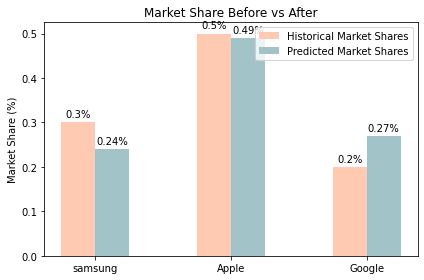

In [17]:
# Companies
companies = ("samsung","Apple","Google")

#Historical Market Share
historical_market_share_samsung = 0.30
historical_market_share_apple = 0.50
historical_market_share_google = 0.20
historical_shares = (historical_market_share_samsung,historical_market_share_apple,historical_market_share_google)

# Sample Data Market Share
predicted_market_share_samsung = 48/200
predicted_market_share_apple = 98/200
predicted_market_share_google = 54/200
predicted_shares = (predicted_market_share_samsung,predicted_market_share_apple,predicted_market_share_google)

# Bar position setup
x = np.arange(len(companies))  # [0, 1, 2]
width = 0.25  # width of the bars

# Plotting
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, historical_shares, width, label='Historical Market Shares', color='#FFCAB1')
bars2 = ax.bar(x + width/2, predicted_shares, width, label='Predicted Market Shares', color='#A2C4C9')

# Labels and title
ax.set_ylabel('Market Share (%)')
ax.set_title('Market Share Before vs After')
ax.set_xticks(x)
ax.set_xticklabels(companies)
ax.legend()

# Add value labels on top
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()

The above graph shows that market share for Google is likely to increase by 7.0%; additionally, the increase in market share for Google is likely to hurt Samsung more than Apple. 